In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Input,Embedding,GlobalMaxPool1D,LSTM,Conv1D,MaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
msgdf=pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [4]:
msgdf['label']=msgdf['label'].map({'ham':0,'spam':1})

In [5]:
y=msgdf['label']

In [6]:
x_train,x_test,y_train,y_test=train_test_split(msgdf['message'],y,test_size=0.3)

In [7]:
tokenizer=Tokenizer(num_words=20000)
tokenizer.fit_on_texts(x_train)
seq_train=tokenizer.texts_to_sequences(x_train)
seq_test=tokenizer.texts_to_sequences(x_test)

In [11]:
v=len(tokenizer.word_index)

In [12]:
v

7499

In [13]:
data_train=pad_sequences(seq_train)

In [16]:
T=data_train.shape[1]

In [17]:
data_test=pad_sequences(seq_test,maxlen=T)

In [19]:
#model
D=20

In [22]:
i=Input(shape=(T,))
x=Embedding(v+1,D)(i)
x=Conv1D(32,3,activation='relu')(x)
x=MaxPool1D()(x)
x=Conv1D(64,3,activation='relu')(x)
x=MaxPool1D()(x)
x=Conv1D(128,3,activation='relu')(x)
x=GlobalMaxPool1D()(x)
x=Dense(1,activation='sigmoid')(x)


model=Model(i,x)

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
r=model.fit(data_train,y_train,validation_data=(data_test,y_test),epochs=10)

Epoch 1/10
122/122 [==============================] - 2s 18ms/step - loss: 0.3841 - accuracy: 0.8579 - val_loss: 0.2988 - val_accuracy: 0.8702
Epoch 2/10
122/122 [==============================] - 2s 13ms/step - loss: 0.1671 - accuracy: 0.9215 - val_loss: 0.0905 - val_accuracy: 0.9743
Epoch 3/10
122/122 [==============================] - 2s 13ms/step - loss: 0.0226 - accuracy: 0.9936 - val_loss: 0.0839 - val_accuracy: 0.9749
Epoch 4/10
122/122 [==============================] - 2s 13ms/step - loss: 0.0075 - accuracy: 0.9974 - val_loss: 0.0898 - val_accuracy: 0.9797
Epoch 5/10
122/122 [==============================] - 2s 13ms/step - loss: 0.0037 - accuracy: 0.9992 - val_loss: 0.0995 - val_accuracy: 0.9779
Epoch 6/10
122/122 [==============================] - 2s 13ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.1067 - val_accuracy: 0.9797
Epoch 7/10
122/122 [==============================] - 2s 13ms/step - loss: 8.8673e-04 - accuracy: 0.9997 - val_loss: 0.1020 - val_accuracy: 0.

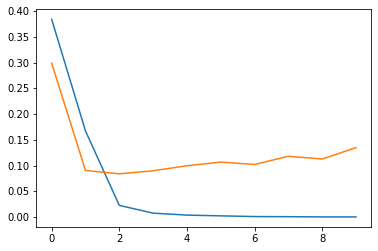

In [25]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

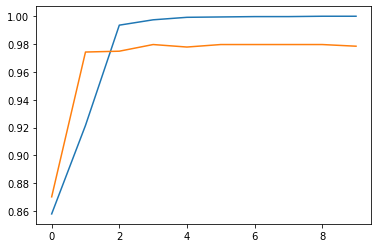

In [26]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])

In [27]:
p=model.predict(data_test)

In [28]:
pred=[]
for i in p:
  if i>0.5:
    pred.append(1)
  elif i<0.5:
    pred.append(0)

In [31]:
target=y_test.values

In [32]:
target[6]

0

In [35]:
pred

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,


In [36]:
p

array([[4.5205681e-07],
       [1.2266934e-03],
       [2.3206740e-08],
       ...,
       [2.2986531e-04],
       [1.0000000e+00],
       [9.9885041e-01]], dtype=float32)